# <a id='toc1_'></a>[Aerofit Case Study](#toc0_)

**Business Problem**

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

**Product Portfolio:**

*   The KP281 is an entry-level treadmill that sells for $1,500.
*   The KP481 is for mid-level runners that sell for $1,750.
*   The KP781 treadmill is having advanced features that sell for $2,500.

**Metric**

We will use count of users, probabilities, conditional probabilities to evaluate the users.


**Table of contents**<a id='toc0_'></a>    
- [Aerofit Case Study](#toc1_)    
- [EDA](#toc2_)    
- [Probabilities](#toc3_)    
  - [Conditional Probabilities](#toc3_1_)    
- [Customer Profile](#toc4_)    
  - [KP281](#toc4_1_)    
  - [KP481](#toc4_2_)    
  - [KP781](#toc4_3_)    
- [Recomendations](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
sns.set_style('darkgrid')
pd.reset_option('display.max_rows')
pd.options.display.float_format = '{:.3f}'.format
from IPython.display import display

In [3]:
df=pd.read_csv('./aerofit_treadmill.csv')

# <a id='toc2_'></a>[EDA](#toc0_)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [5]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [6]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [7]:
df["Gender"]=df["Gender"].astype("category")
df["MaritalStatus"]=df["MaritalStatus"].astype("category")
df["Product"]=df["Product"].astype("category")

Using `describe()` method we can get statistics of all numerical columns 

In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000,180.000,180.000,180.000,180.000,180.000
mean,28.789,15.572,3.456,3.311,53719.578,103.194
std,6.943,1.617,1.085,0.959,16506.684,51.864
min,18.000,12.000,2.000,1.000,29562.000,21.000
25%,24.000,14.000,3.000,3.000,44058.750,66.000
50%,26.000,16.000,3.000,3.000,50596.500,94.000
75%,33.000,16.000,4.000,4.000,58668.000,114.750
max,50.000,21.000,7.000,5.000,104581.000,360.000


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

Other than **Miles** column, the mean and median values of columns are almost identical.

In [11]:
variables = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

In [9]:
df.describe(include='category')

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


Using `groupby("Product")` function we can group the data based on the `Product` column and find statistical data of users for each product.

In [10]:
agg_functions = [ "mean", "median", "min", "max"]
df.groupby("Product").agg({
    "Age":agg_functions,
    "Education": agg_functions,
    "Income": agg_functions
})
print("")
df.groupby("Product").agg({
    "Miles":agg_functions,
    "Usage": agg_functions,
    "Fitness": agg_functions
})

Age                Education                   Income            \
          mean median min max      mean median min max      mean    median   
Product                                                                      
KP281   28.550 26.000  18  50    15.037 16.000  12  18 46418.025 46617.000   
KP481   28.900 26.000  19  48    15.117 16.000  12  18 48973.650 49459.500   
KP781   29.100 27.000  22  48    17.325 18.000  14  21 75441.575 76568.500   

                        
           min     max  
Product                 
KP281    29562   68220  
KP481    31836   67083  
KP781    48556  104581

Miles                  Usage                Fitness               
           mean  median min  max  mean median min max    mean median min max
Product                                                                     
KP281    82.787  85.000  38  188 3.087  3.000   2   5   2.962  3.000   1   5
KP481    87.933  85.000  21  212 3.067  3.000   2   5   2.900  3.000   1   4
KP781   166.900 160.000  80  360 4.775  5.000   3   7   4.625  5.000   3   5

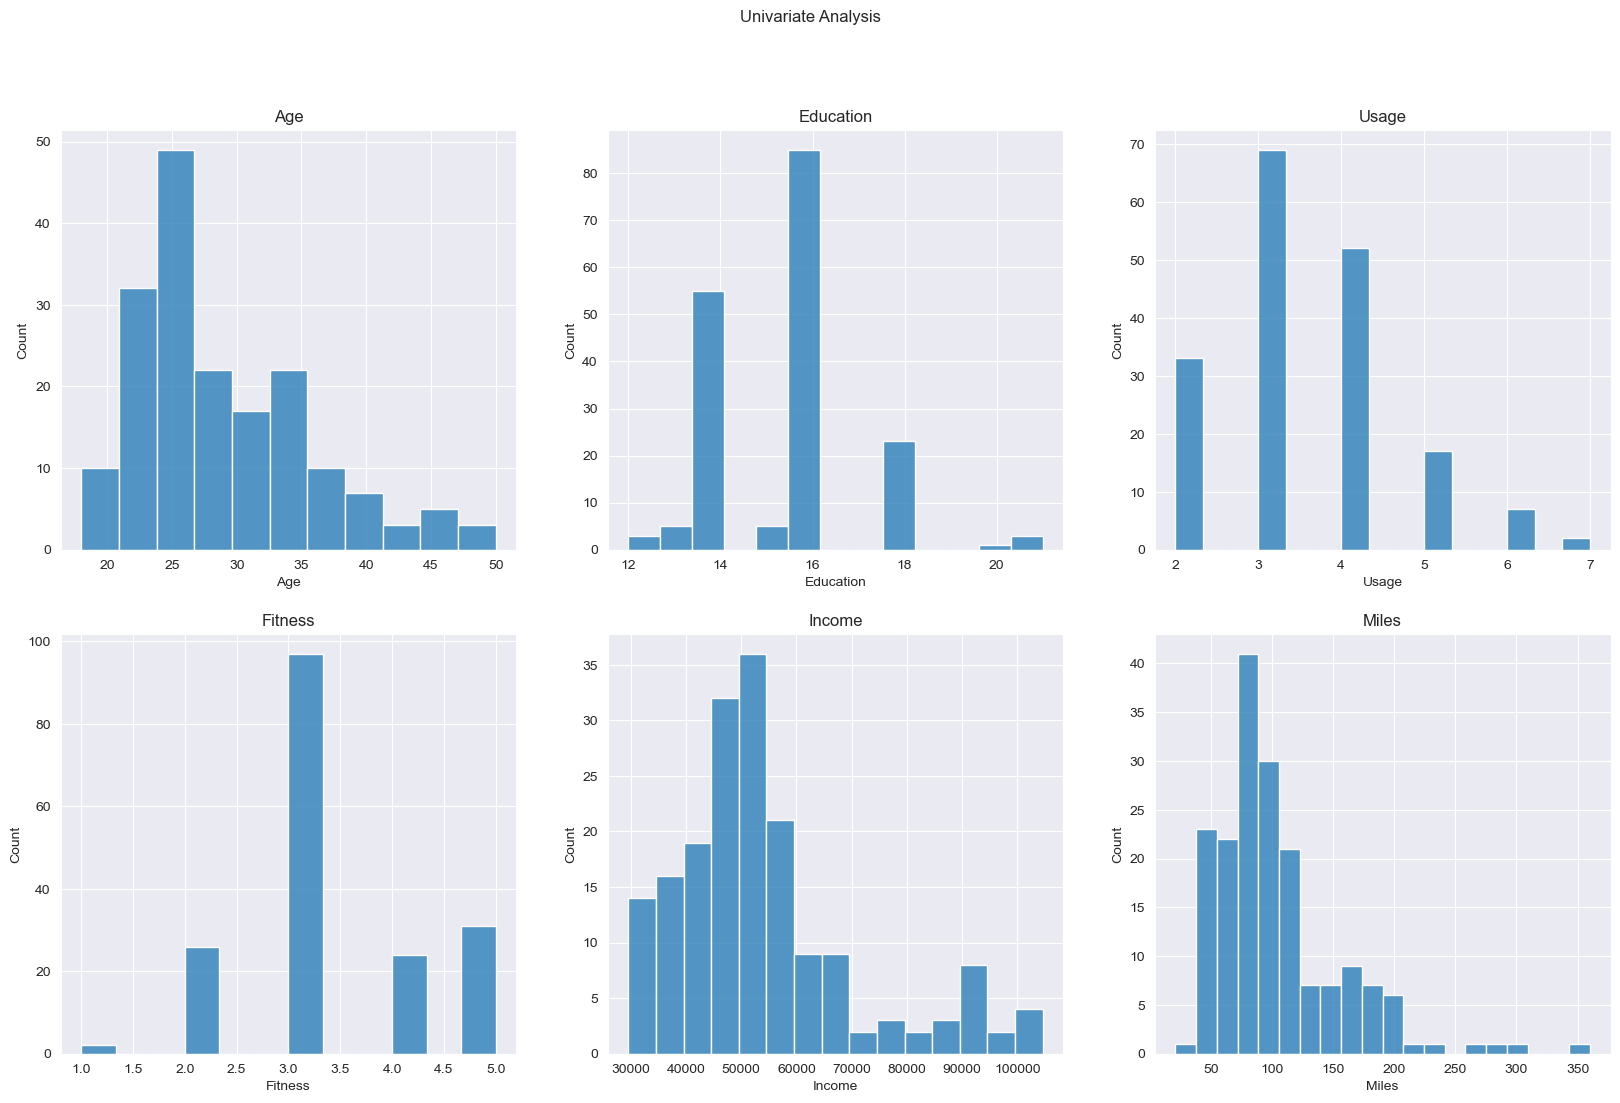

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        variable = variables[i * 3 + j]
        sns.histplot(ax=axes[i, j], data=df, x=variable)
        axes[i, j].set_title(variable) 
        
plt.suptitle("Univariate Analysis")
plt.show();

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Most of the users are around 25 years of age,  having 16 years of education with around $50000 of annual income.
- Majority of the users have fitness of level 3, use the treadmill 3 times a week and walk/run around 90 miles each week

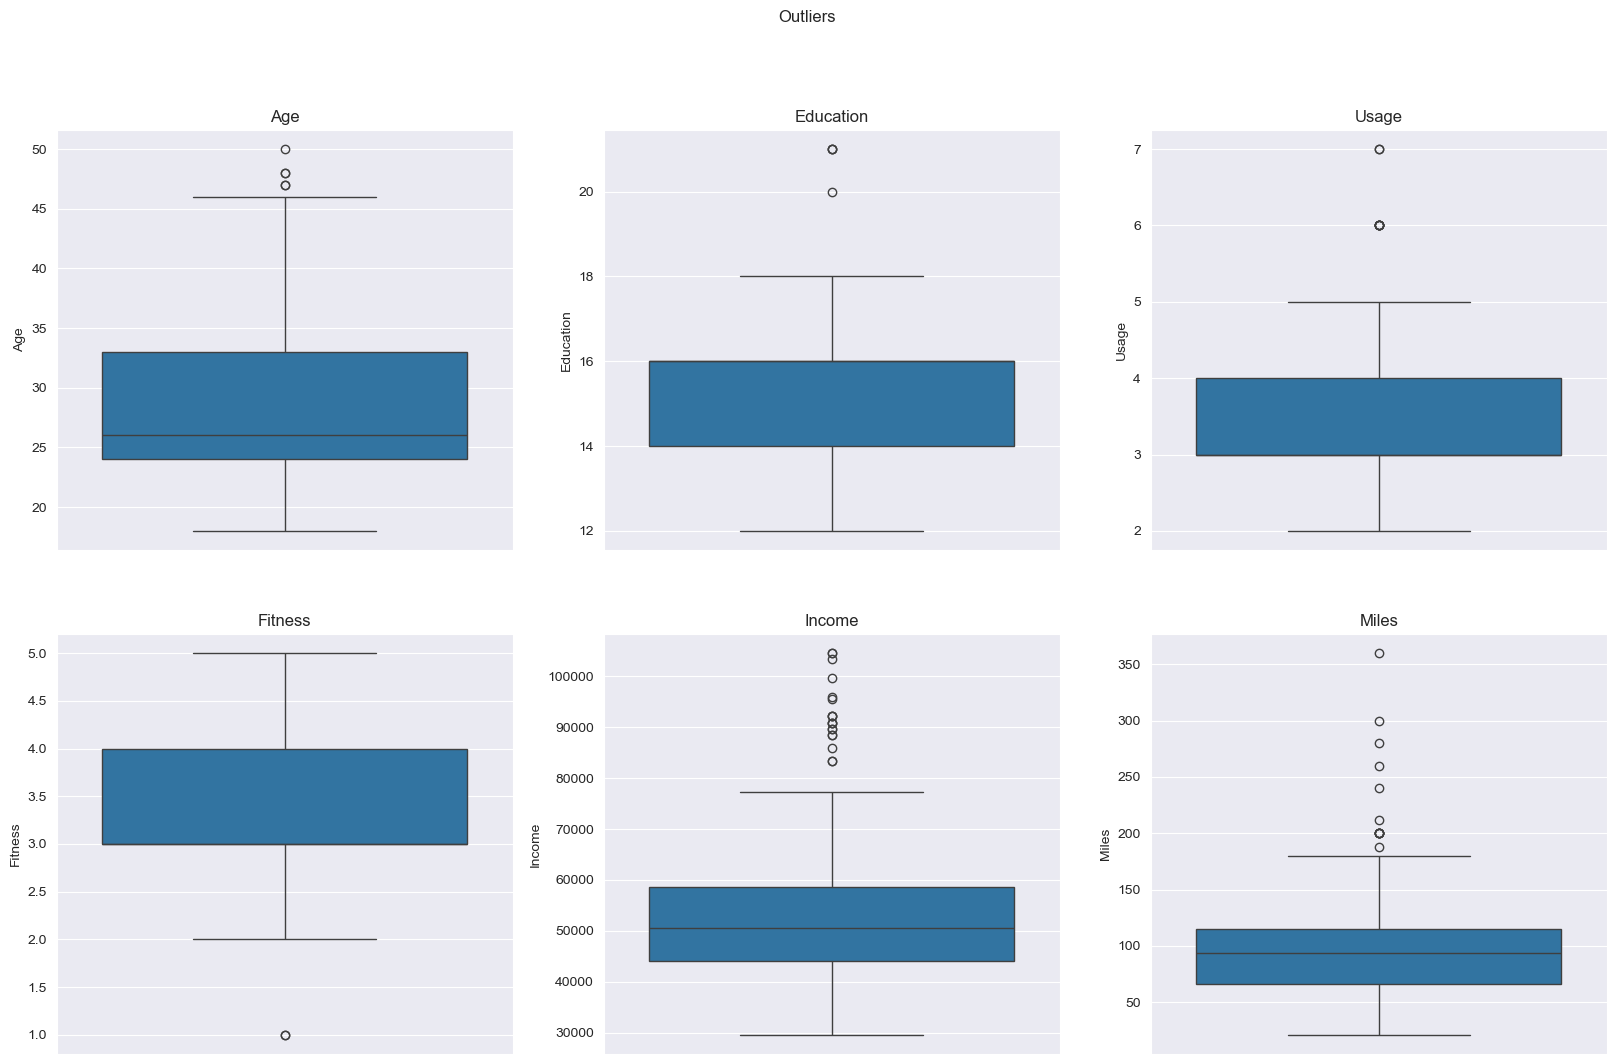

In [13]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        variable = variables[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, y=variable)
        axes[i, j].set_title(variable) 
        
plt.suptitle("Outliers")
plt.show();

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- There seems to be be lot of outliers for **Income** and **Miles** column

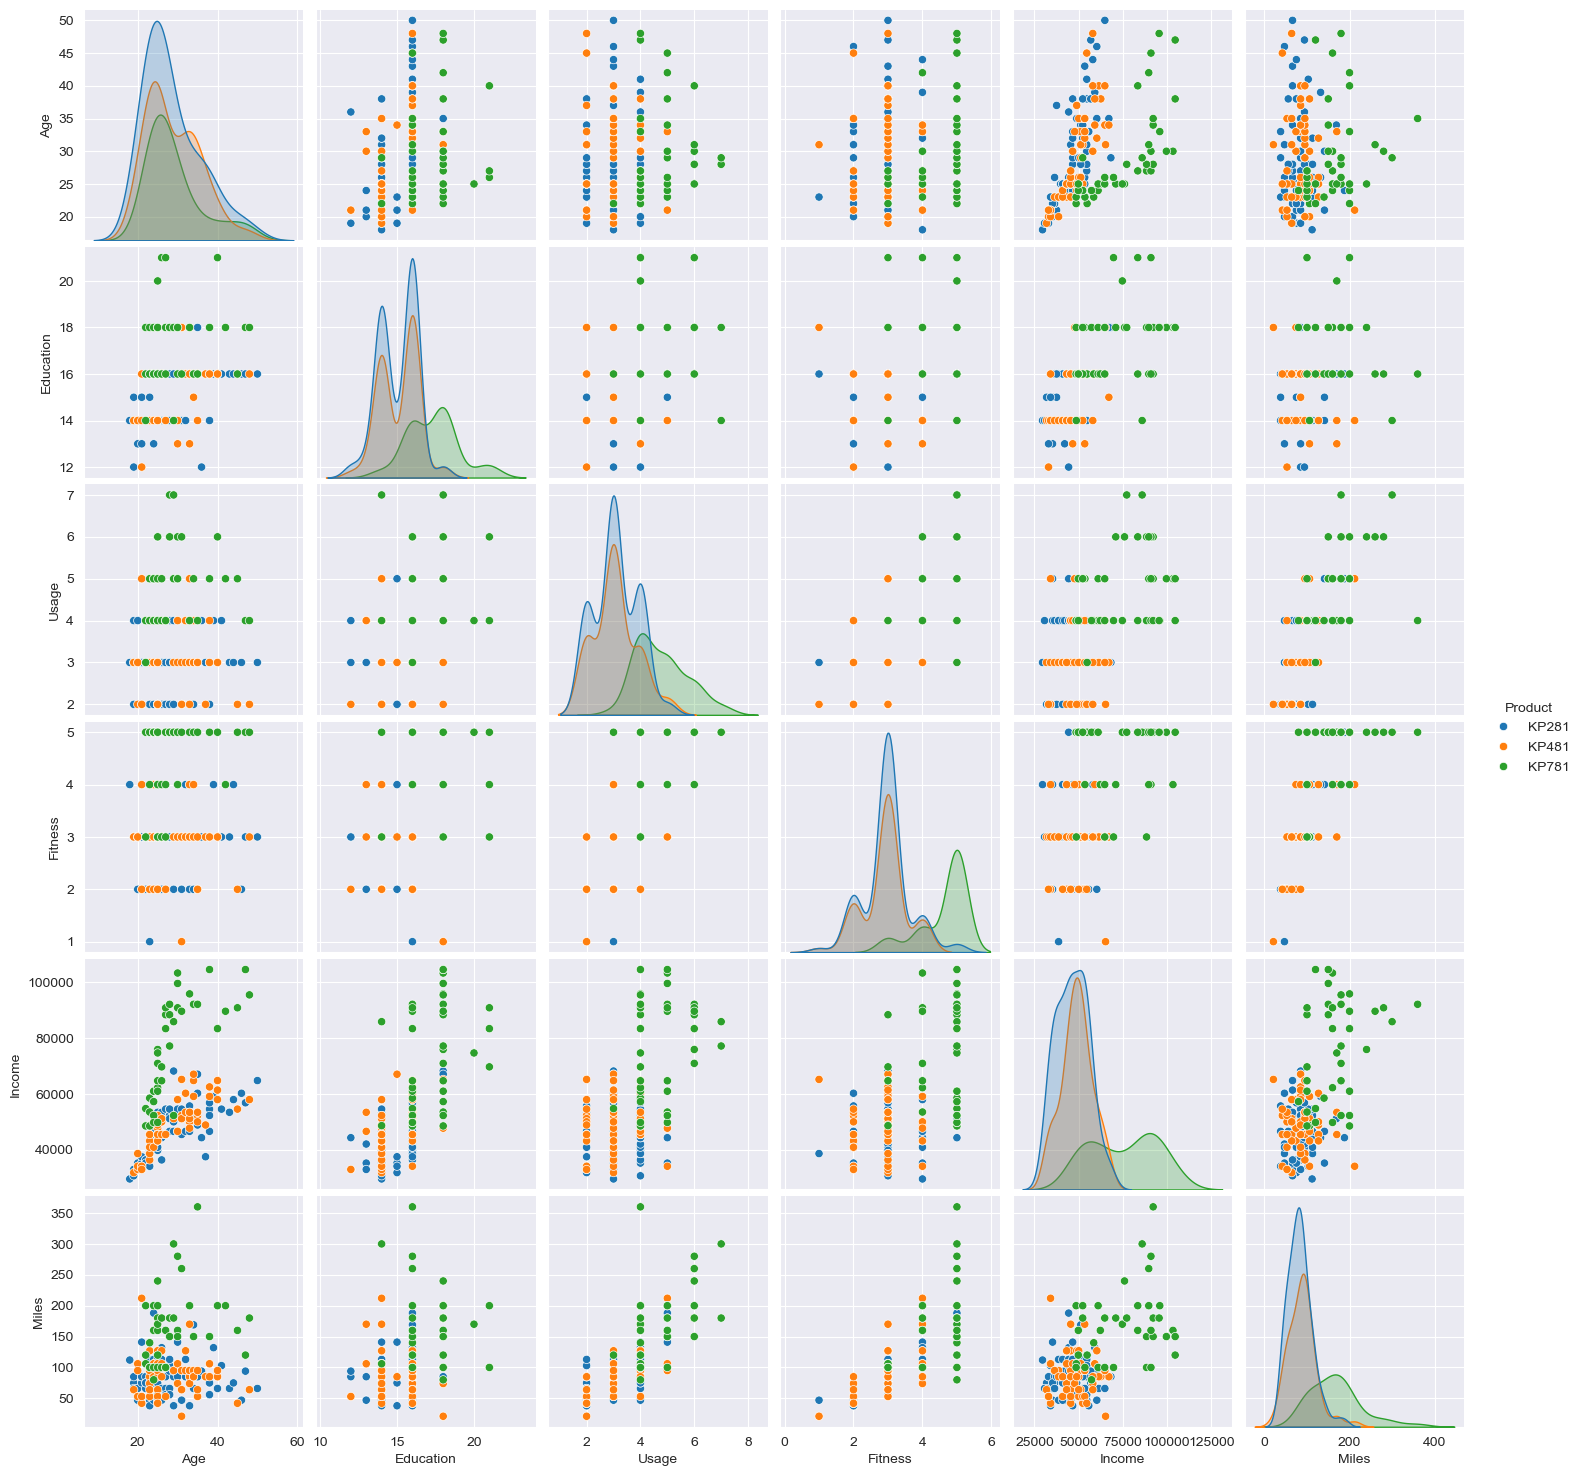

In [14]:
sns.pairplot(df,hue="Product");

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above plots we can clearly distinguish the user of **KP781** based on **Fitness**, **Miles**, **Income** and **Usage**
- The users of **KP281** and **KP481** are similar in pattern. This will require a deeper analysis to differentiate between the two.

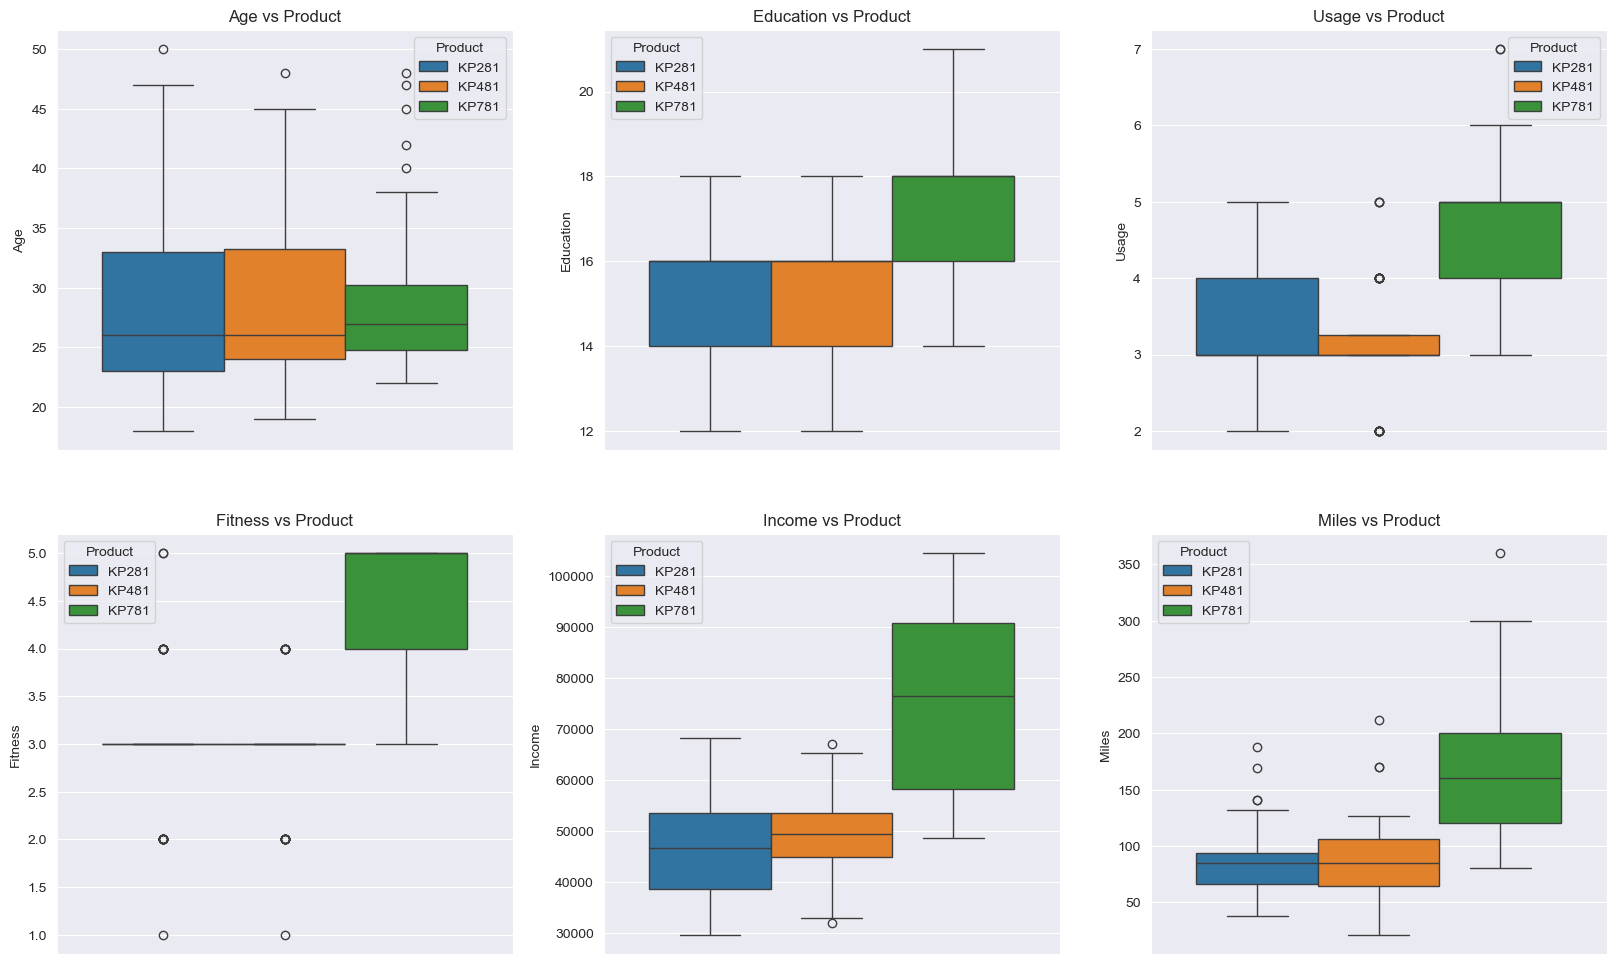

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        variable = variables[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, y=variable, hue="Product")
        axes[i, j].set_title(f"{variable} vs Product") 

plt.show();

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- Above plot shows that **Education**,**Fitness**, **Income**, **Usage**, and **Miles** have big impact on sales of KP781

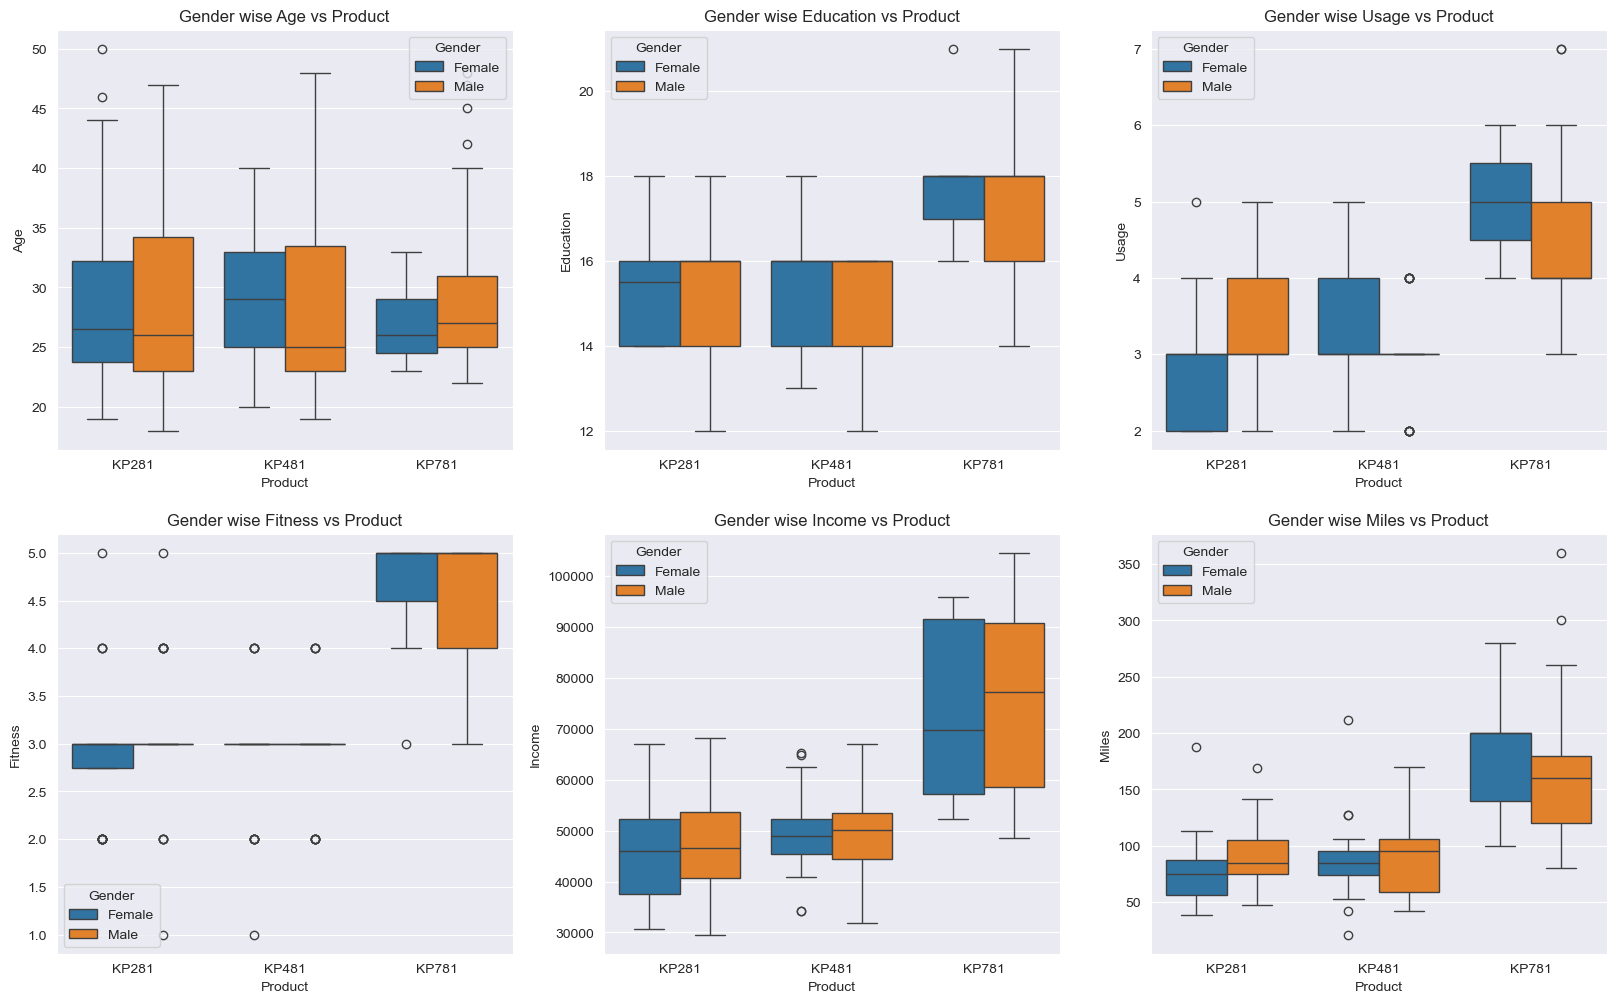

In [16]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        variable = variables[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, x="Product", y=variable, hue="Gender")
        axes[i, j].set_title(f"Gender wise {variable} vs Product") 

plt.show();

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- From above plot we can see that usage of female users of KP281 is very less as compared to female users of KP781


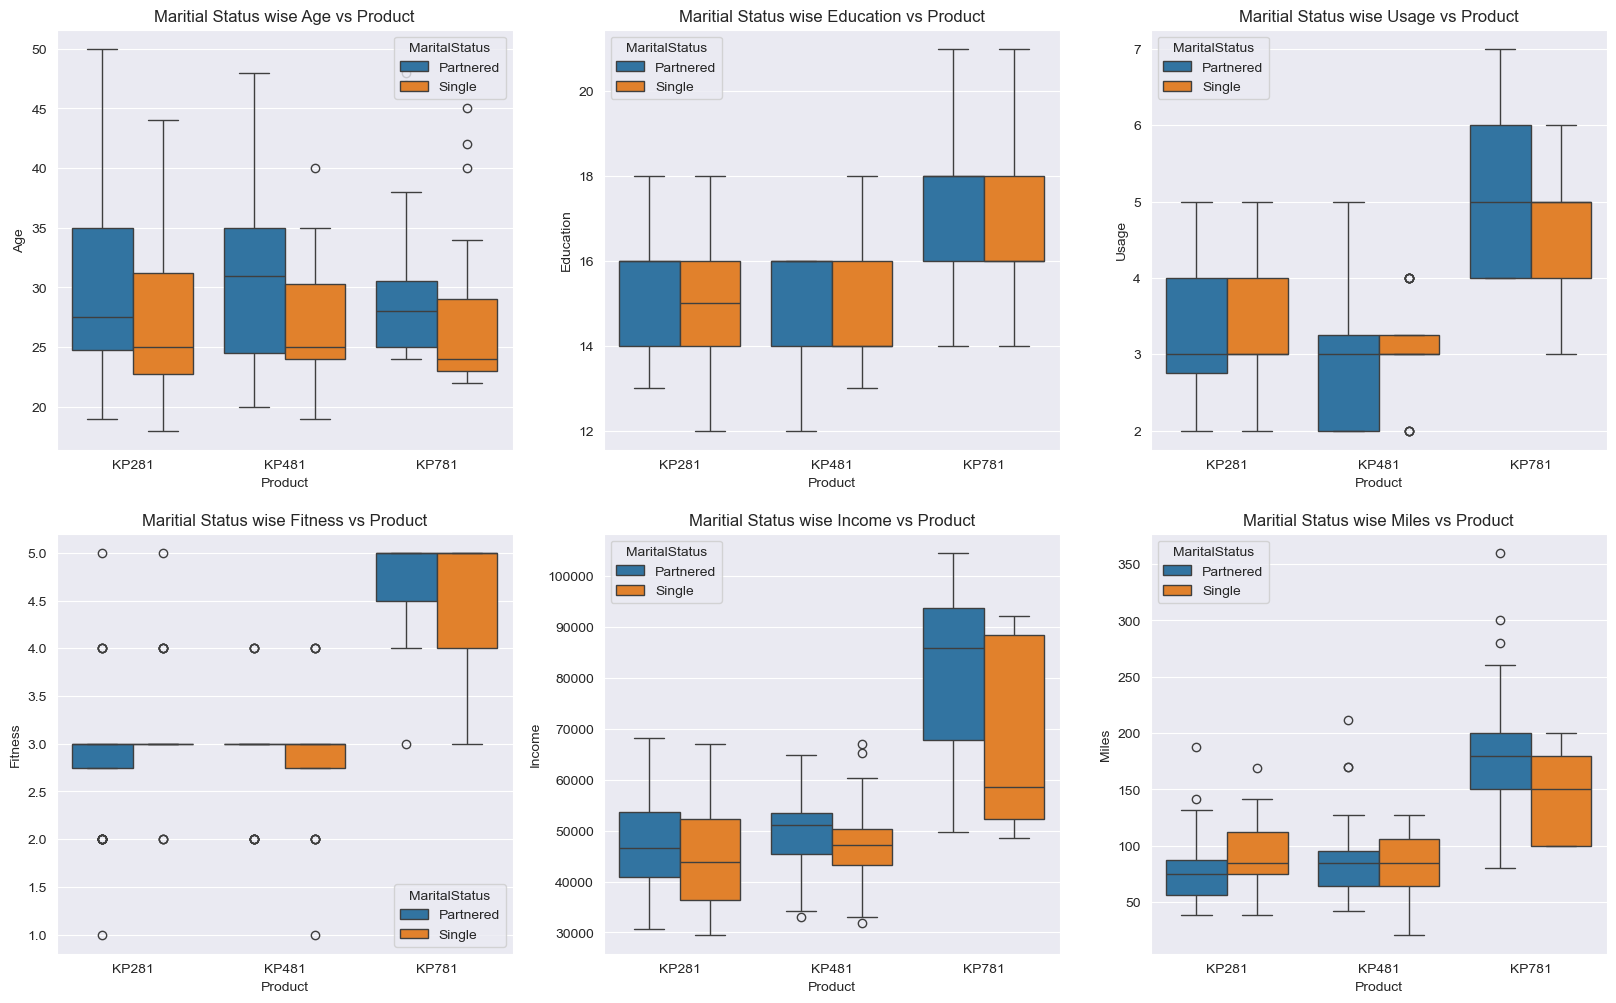

In [17]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))

for i in range(2):
    for j in range(3):
        variable = variables[i * 3 + j]
        sns.boxplot(ax=axes[i, j], data=df, x="Product", y=variable, hue="MaritalStatus")
        axes[i, j].set_title(f"Maritial Status wise {variable} vs Product") 
plt.show();

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- **Partnered** users has higher usage of *KP781* as compared to **Single** KP781 users.

In [18]:
df_enc=pd.get_dummies(df).astype(int)
df_enc

,Age,Education,Usage,Fitness,Income,Miles,Product_KP281,Product_KP481,Product_KP781,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,18,14,3,4,29562,112,1,0,0,0,1,0,1
1,19,15,2,3,31836,75,1,0,0,0,1,0,1
2,19,14,4,3,30699,66,1,0,0,1,0,1,0
3,19,12,3,3,32973,85,1,0,0,0,1,0,1
4,20,13,4,2,35247,47,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,40,21,6,5,83416,200,0,0,1,0,1,0,1
176,42,18,5,4,89641,200,0,0,1,0,1,0,1
177,45,16,5,5,90886,160,0,0,1,0,1,0,1
178,47,18,4,5,104581,120,0,0,1,0,1,1,0


In [19]:
cols = list(df_enc.columns.values)
cols

['Age',
 'Education',
 'Usage',
 'Fitness',
 'Income',
 'Miles',
 'Product_KP281',
 'Product_KP481',
 'Product_KP781',
 'Gender_Female',
 'Gender_Male',
 'MaritalStatus_Partnered',
 'MaritalStatus_Single']

In [20]:
cols=[
    'Product_KP281',
    'Product_KP481',
    'Product_KP781',
    'Age',
    'Education',
    'Usage',
    'Fitness',
    'Income',
    'Miles',
    'Gender_Female',
    'Gender_Male',
    'MaritalStatus_Partnered',
    'MaritalStatus_Single'
]
df_enc = df_enc[cols]

In [21]:
df_enc

,Product_KP281,Product_KP481,Product_KP781,Age,Education,Usage,Fitness,Income,Miles,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,1,0,0,18,14,3,4,29562,112,0,1,0,1
1,1,0,0,19,15,2,3,31836,75,0,1,0,1
2,1,0,0,19,14,4,3,30699,66,1,0,1,0
3,1,0,0,19,12,3,3,32973,85,0,1,0,1
4,1,0,0,20,13,4,2,35247,47,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,0,0,1,40,21,6,5,83416,200,0,1,0,1
176,0,0,1,42,18,5,4,89641,200,0,1,0,1
177,0,0,1,45,16,5,5,90886,160,0,1,0,1
178,0,0,1,47,18,4,5,104581,120,0,1,1,0


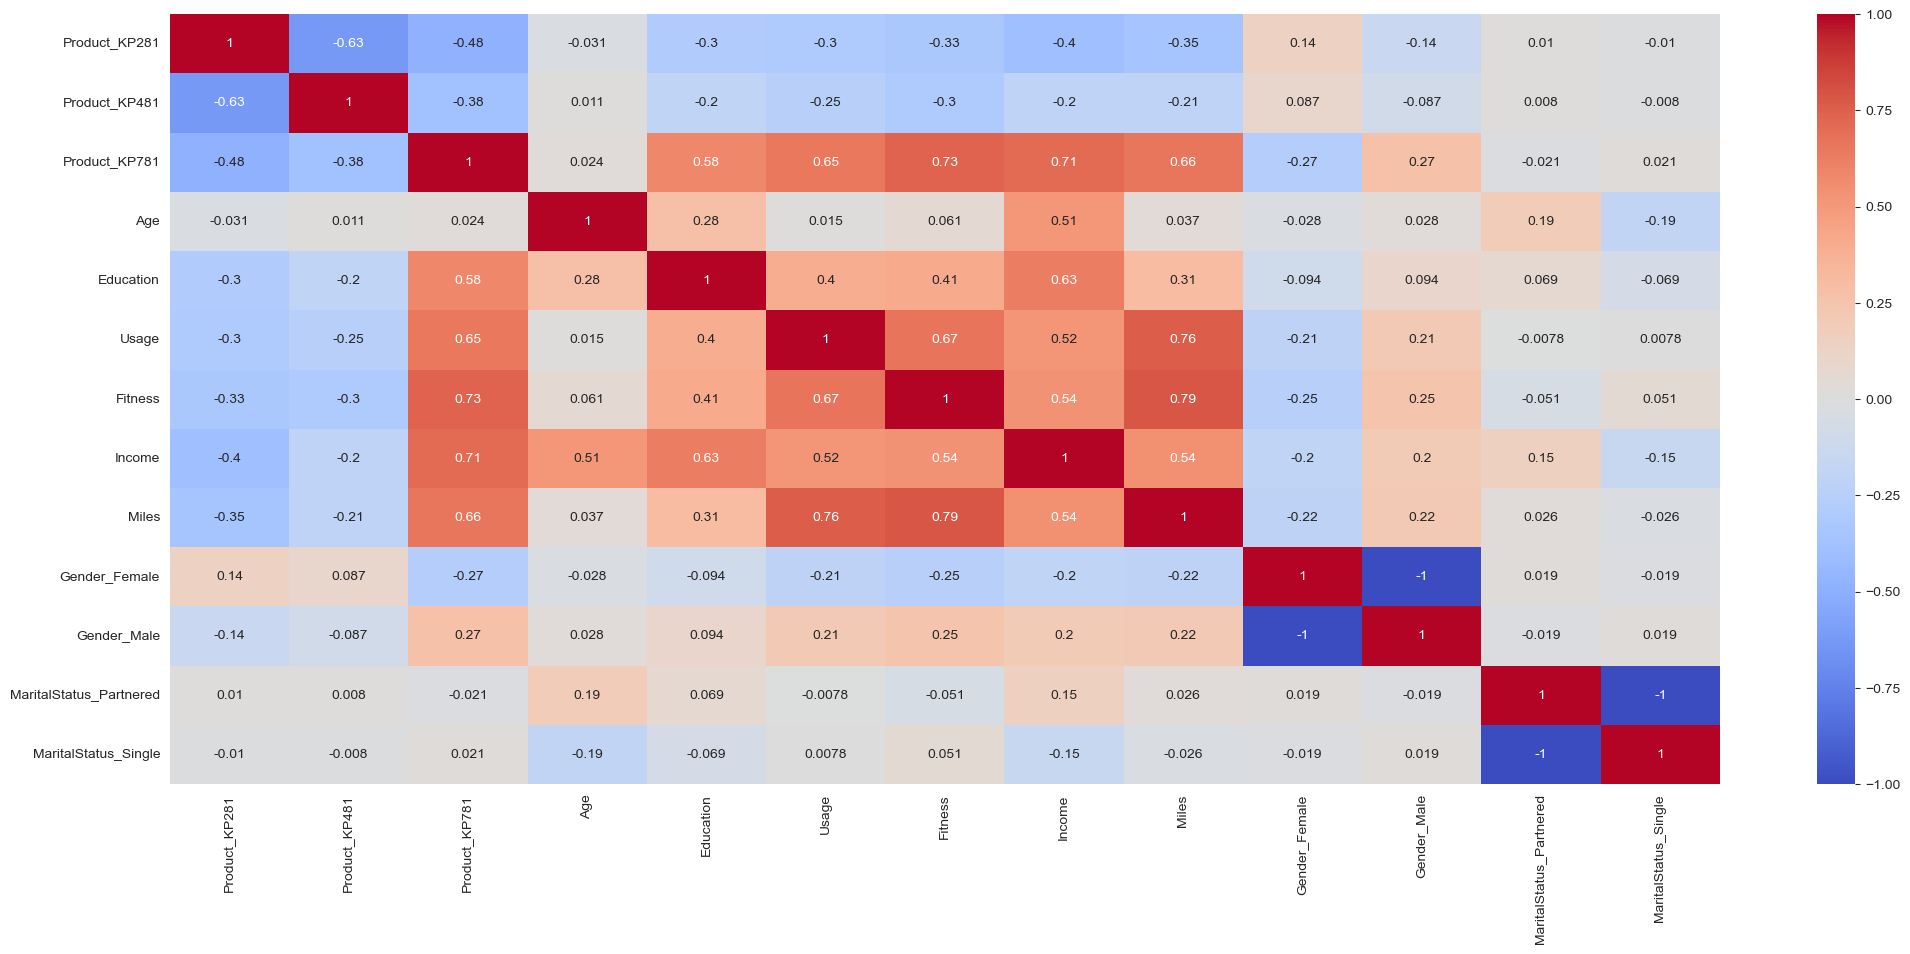

In [22]:
plt.figure(figsize=(25, 10))
sns.heatmap(df_enc.corr(), annot=True, cmap=sns.color_palette("coolwarm", as_cmap=True))
plt.yticks(rotation=0);

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

From above heatmap we can say that :
- Fitness, Income, Miles, Usage have very high positive correlations with each KP781, but have negative correlations with each KP281 and KP481.
- Age, Maritial Status have negligible correlations with each all products
- Male user have positive correlations with KP781, but have negative correlations with other products
- Female user have positive correlations with KP281 and KP481, but have negative correlations with KP781

# <a id='toc3_'></a>[Probabilities](#toc0_)

In [23]:
df["Product"].value_counts(normalize=True)

Product
KP281   0.444
KP481   0.333
KP781   0.222
Name: proportion, dtype: float64

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

On a larger scale we can say that:
- Probability that a user will buy KP281 is 44%
- Probability that a user will buy KP781 is 22%
- KP281 is the most popular product

Using `pandas.crosstab()` function we can find probabilities of each **Category** with respect to the each **Product** item

In [24]:
print("Maritial Status vs Products")
pd.crosstab(index=df["MaritalStatus"], columns=df['Product'] , margins=True,  normalize=True)

print("\nGender vs Products")
pd.crosstab(index=df["Gender"], columns=df['Product'], margins=True, normalize=True)

Maritial Status vs Products


Product,KP281,KP481,KP781,All
MaritalStatus,,,,
Partnered,0.267,0.200,0.128,0.594
Single,0.178,0.133,0.094,0.406
All,0.444,0.333,0.222,1.000



Gender vs Products


Product,KP281,KP481,KP781,All
Gender,,,,
Female,0.222,0.161,0.039,0.422
Male,0.222,0.172,0.183,0.578
All,0.444,0.333,0.222,1.000


<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>

- 59.4% of total users are **Partnered** users
- 26.7% of total users are using **KP281** product


## <a id='toc3_1_'></a>[Conditional Probabilities](#toc0_)

Using `conditions` inside a dataframe and `value_counts()` function, we can find conditional probabilities

In [25]:
print("Probability (Product | Male)")
df[df["Gender"] == "Male"]["Product"].value_counts(normalize=True)

print("\nProbability (Product | Female)")
df[df["Gender"] == "Female"]["Product"].value_counts(normalize=True)

Probability (Product | Male)


Product
KP281   0.385
KP781   0.317
KP481   0.298
Name: proportion, dtype: float64


Probability (Product | Female)


Product
KP281   0.526
KP481   0.382
KP781   0.092
Name: proportion, dtype: float64

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>



Above data shows that
- **Female** users are more likely to buy **KP281** and highly unlikely to buy **KP781**.
- There is almost equal distribution of **Products** between the **Male** users

In [26]:
print("Probability (Product | Partnered)")
df[df["MaritalStatus"] == "Partnered"]["Product"].value_counts(normalize=True)

print("\nProbability (Product | Single)")
df[df["MaritalStatus"] == "Single"]["Product"].value_counts(normalize=True)

Probability (Product | Partnered)


Product
KP281   0.449
KP481   0.336
KP781   0.215
Name: proportion, dtype: float64


Probability (Product | Single)


Product
KP281   0.438
KP481   0.329
KP781   0.233
Name: proportion, dtype: float64

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>


Above data shows that 
- **Single** users have higher probability of buying **KP781** than **Partnered** users  
- **Partnered** users have higher probability of buying **KP481**.



In [27]:
print("Probability (MaritalStatus | KP281)")
df[df["Product"] == "KP281"]["MaritalStatus"].value_counts(normalize=True)

print("Probability (MaritalStatus | KP481)")
df[df["Product"] == "KP481"]["MaritalStatus"].value_counts(normalize=True)

print("Probability (MaritalStatus | KP781)")
df[df["Product"] == "KP781"]["MaritalStatus"].value_counts(normalize=True)

Probability (MaritalStatus | KP281)


MaritalStatus
Partnered   0.600
Single      0.400
Name: proportion, dtype: float64

Probability (MaritalStatus | KP481)


MaritalStatus
Partnered   0.600
Single      0.400
Name: proportion, dtype: float64

Probability (MaritalStatus | KP781)


MaritalStatus
Partnered   0.575
Single      0.425
Name: proportion, dtype: float64

<b style="padding: 2px 8px;border-radius: 5px;background: #9C27B0;color: #fff;display: inline-block;">Insights</b>


Above data shows that 
- Among users using Aerofit products, there are more **Partnered** users than **Single** users.


In [28]:
df[df["Product"] == "KP281"]["Gender"].value_counts(normalize=True)
df[df["Product"] == "KP481"]["Gender"].value_counts(normalize=True)
df[df["Product"] == "KP781"]["Gender"].value_counts(normalize=True)

Gender
Female   0.500
Male     0.500
Name: proportion, dtype: float64

Gender
Male     0.517
Female   0.483
Name: proportion, dtype: float64

Gender
Male     0.825
Female   0.175
Name: proportion, dtype: float64

In [32]:
print("\nProbability (Product | Single & Male)")
df[(df["MaritalStatus"] == "Single") & (df["Gender"]=="Male")]["Product"].value_counts(normalize=True)

print(" \nProbability (Product | Single & Female)")
df[(df["MaritalStatus"] == "Single") & (df["Gender"]=="Female")]["Product"].value_counts(normalize=True)

print("\nProbability (Product | Partnered & Male)")
df[(df["MaritalStatus"] == "Partnered") & (df["Gender"]=="Male")]["Product"].value_counts(normalize=True)

print("\nProbability (Product | Partnered & Female)")
df[(df["MaritalStatus"] == "Partnered") & (df["Gender"]=="Female")]["Product"].value_counts(normalize=True)


Probability (Product | Single & Male)


Product
KP281   0.442
KP781   0.326
KP481   0.233
Name: proportion, dtype: float64

 
Probability (Product | Single & Female)


Product
KP481   0.467
KP281   0.433
KP781   0.100
Name: proportion, dtype: float64


Probability (Product | Partnered & Male)


Product
KP281   0.344
KP481   0.344
KP781   0.311
Name: proportion, dtype: float64


Probability (Product | Partnered & Female)


Product
KP281   0.587
KP481   0.326
KP781   0.087
Name: proportion, dtype: float64

# <a id='toc4_'></a>[Customer Profile](#toc0_)

## <a id='toc4_1_'></a>[KP281](#toc0_)
- Age : Around 28, but under 35
- Income : Less than 50000
- Fitness: under 3
- Miles : Under 90
- Usage: 3-4
- Education : less than 16
- Marital Status : Both, but targeted more towards Partnered (60% Probability)
- Gender: Both

## <a id='toc4_2_'></a>[KP481](#toc0_)
- Age: Around 28, but under 35
- Income : If Partnered then around 50000 else less than 50000
- Education : less than 16
- Fitness: under 3
- Miles : Around 100
- Usage: 3
- Marital Status : Both, but targeted more towards Partnered (60% Probability)
- Gender: Both, but targeted more towards Male (51.7% Probability)

## <a id='toc4_3_'></a>[KP781](#toc0_)
- Age: Under 30
- Income : Above 60000
- Fitness: Above 3
- Education : Above 16
- Usage : Above 4
- Miles : Above 120
- Gender: Male (82.7% Probability)
- Maritial Status : Both, but targeted more towards Partnered (57% Probability)

# <a id='toc5_'></a>[Recomendations](#toc0_)

- The data show that KP481(mid level) has almost same type of users as that of KP281(entry level). The sales of this middle can be increased by adding some features from KP781(top level).This can also accompanied by slight increase in price.
- Discount on KP781 can be given to female users to increase the sale.
